<IPython.core.display.Javascript object>


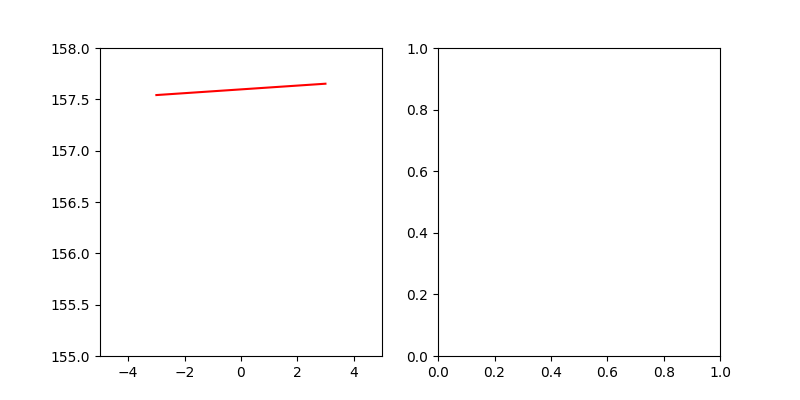

In [92]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation
from matplotlib import patches as pat
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

bl_width = 6
bl_height = 3

#CSV読み込み
filename ='sample1.csv'
df = pd.read_csv( filename, header=None )

col_name = ['Left_H','Right_H']
df.columns = col_name

#回転角
df['theta'] = np.arctan((df['Right_H'] - df['Left_H']) / bl_width)
df['theta_deg'] = np.degrees(df['theta'])

#左刃先X座標
df['LD_X'] = -(bl_width / 2)*np.cos( df['theta'])

#刃先高さの最大値、最小値
max_H = math.floor(max( df['Left_H'].max(), df['Right_H'].max() ))
min_H = math.floor(min( df['Left_H'].min(), df['Right_H'].min() ))


#図の描写
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlim(-bl_width/2 - 2, bl_width/2 + 2)
ax1.set_ylim( min_H, max_H + 1 )

df['x1'] = df['LD_X']
df['y1'] = df['Left_H']
df['x2'] = df['LD_X'] + bl_width*np.cos(df['theta'])
df['y2'] = df['Left_H'] + bl_width*np.sin(df['theta'])
df['x3'] = df['LD_X'] - bl_height*np.sin(df['theta'])
df['y3'] = df['Left_H'] + bl_height*np.cos(df['theta'])
df['x4'] = df['x3'] + bl_width*np.cos(df['theta'])
df['y4'] = df['y3'] + bl_width*np.sin(df['theta'])

ani = []
txt = []
for i in range(df.index[-1]):
    line12 = ax1.plot([df.loc[i,['x1']],df.loc[i,['x2']]],[df.loc[i,['y1']],df.loc[i,['y2']]],color="red")
    #line24 = ax1.plot([df.loc[i,['x2']],df.loc[i,['x4']]],[df.loc[i,['y2']],df.loc[i,['y4']]],color="green")
    #line31 = ax1.plot([df.loc[i,['x3']],df.loc[i,['x1']]],[df.loc[i,['y3']],df.loc[i,['y1']]],color="black")
    #line43 = ax1.plot([df.loc[i,['x4']],df.loc[i,['x3']]],[df.loc[i,['y4']],df.loc[i,['y3']]],color="pink")
    
    #if i % 500 == 1:
        #left_h = ax2.text(0, 0, 'Left_Height:{}'.format(df.iloc[i,6]))
        
    #left_h = ax2.text(0, 0, 'Left_Height:{}'.format(df.iloc[i,6]))
       
    #ani.append([line12,line24,line31,line43])
    #ani.append([line12,left_h])
    ani.append(line12)
    #ani.append(left_h)
    
    

    
anim = ArtistAnimation(fig, ani, interval=2)
plt.show()



In [69]:
#df[400:410]
#df.head()

,Left_H,Right_H,theta,theta_deg,LD_X,x1,y1,x2,y2,x3,y3,x4,y4
0,155.10,155.10,0.0,0.0,-3.0,-3.0,155.10,3.0,155.10,-3.0,158.10,3.0,158.10
1,155.11,155.11,0.0,0.0,-3.0,-3.0,155.11,3.0,155.11,-3.0,158.11,3.0,158.11
2,155.11,155.11,0.0,0.0,-3.0,-3.0,155.11,3.0,155.11,-3.0,158.11,3.0,158.11
3,155.12,155.12,0.0,0.0,-3.0,-3.0,155.12,3.0,155.12,-3.0,158.12,3.0,158.12
4,155.12,155.12,0.0,0.0,-3.0,-3.0,155.12,3.0,155.12,-3.0,158.12,3.0,158.12


<IPython.core.display.Javascript object>


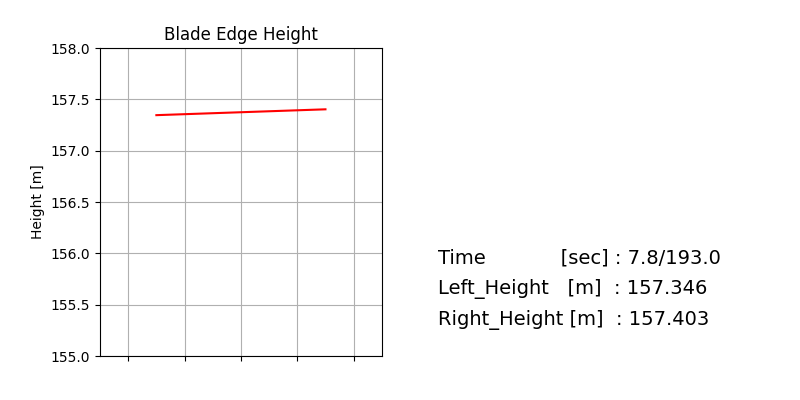

In [121]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation
from matplotlib import patches as pat
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

bl_width = 6
bl_height = 3

#CSV読み込み。y1：左刃先高さ、y2：右刃先高さ
filename ='sample1.csv'
df = pd.read_csv( filename, header=None )

col_name = ['y1','y2']
df.columns = col_name

#回転角
df['theta'] = np.arctan((df['y2'] - df['y1']) / bl_width)
df['theta_deg'] = np.degrees(df['theta'])

#左刃先X座標
df['x1'] = -(bl_width / 2)*np.cos( df['theta'])

#刃先高さの最大値、最小値
max_H = math.floor(max( df['y1'].max(), df['y2'].max() ))
min_H = math.floor(min( df['y1'].min(), df['y2'].min() ))

#座標計算
df['x2'] = df['x1'] + bl_width*np.cos(df['theta'])
df['y2'] = df['y1'] + bl_width*np.sin(df['theta'])
#df['x3'] = df['x1'] - bl_height*np.sin(df['theta'])
#df['y3'] = df['y1'] + bl_height*np.cos(df['theta'])
#df['x4'] = df['x3'] + bl_width*np.cos(df['theta'])
#df['y4'] = df['y3'] + bl_width*np.sin(df['theta'])


#図の描写
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)



def ani_func(i):
    ax1.cla()
    ax2.cla()
    ax1.grid()
    ax1.set_title('Blade Edge Height')
    ax1.set_ylabel("Height [m]")
    
    ax1.set_xlim(-bl_width/2 - 2, bl_width/2 + 2)
    ax1.set_ylim( min_H, max_H + 1 )
    ax1.axes.xaxis.set_ticklabels([])
    ax1.plot([df.loc[i,['x1']],df.loc[i,['x2']]],[df.loc[i,['y1']],df.loc[i,['y2']]],color="red")
    #ax1.plot([df.loc[i,['x2']],df.loc[i,['x4']]],[df.loc[i,['y2']],df.loc[i,['y4']]],color="red")
    #ax1.plot([df.loc[i,['x3']],df.loc[i,['x1']]],[df.loc[i,['y3']],df.loc[i,['y1']]],color="red")
    #ax1.plot([df.loc[i,['x4']],df.loc[i,['x3']]],[df.loc[i,['y4']],df.loc[i,['y3']]],color="red")
    
    ax2.axis("off")
    ax2.text(0, 0.3, 'Time            [sec] : {}/{}'.format(round(df.index[i]*0.01,1),df.index[-1]/100),size=14)
    ax2.text(0, 0.2, 'Left_Height   [m]  : {}'.format(round(df.iloc[i,0],3)),size=14)
    ax2.text(0, 0.1, 'Right_Height [m]  : {}'.format(round(df.iloc[i,1],3)),size=14)

ani = animation.FuncAnimation(fig, ani_func, interval=100, frames=np.arange(0,df.index[-1],10), repeat=False)
plt.show()